<a href="https://colab.research.google.com/github/gustavoramos82/Classificando-Fake-News-/blob/main/Notebooks/Classificando_Fake_News_An%C3%A1lise_por_Ano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando análise fake news por ano

Neste notebook será feita uma análise das noticias de fake news por ano, para verificar se há alguma diferença nos principais tópicos por ano

In [28]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
fake = pd.read_csv(r'/content/drive/MyDrive/Datasets/Fake news deep/Prata/Fake_tratado.csv',lineterminator='\n')
fake.drop('Unnamed: 0',axis=1,inplace=True)
fake.head()


,title,text,subject,date
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,2017-12-31
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,2017-12-31
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,2017-12-30
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,2017-12-29
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,2017-12-25


In [30]:
true = pd.read_csv(r'/content/drive/MyDrive/Datasets/Fake news deep/Prata/True_tratado.csv',lineterminator='\n')
true.drop('Unnamed: 0',axis=1,inplace=True)
true.head()

,title,text,subject,date
0,us budget fight loom republican flip fiscal sc...,washington reuter head conserv republican fac...,politicsNews,2017-12-31
1,us militari accept transgend recruit monday pe...,washington reuter transgend peopl allow first...,politicsNews,2017-12-29
2,senior us republican senat let mr mueller job,washington reuter special counsel investig li...,politicsNews,2017-12-31
3,fbi russia probe help australian diplomat tipo...,washington reuter trump campaign advis georg ...,politicsNews,2017-12-30
4,trump want postal servic charg much amazon shi...,seattlewashington reuter presid donald trump ...,politicsNews,2017-12-29


In [31]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [32]:
true['date'] = pd.to_datetime(true['date'])

In [33]:
fake['date'] = pd.to_datetime(fake['date'])

In [34]:
true['ano'] = true['date'].dt.year
fake['ano'] = fake['date'].dt.year

In [35]:
true.head()


,title,text,subject,date,ano
0,us budget fight loom republican flip fiscal sc...,washington reuter head conserv republican fac...,politicsNews,2017-12-31,2017
1,us militari accept transgend recruit monday pe...,washington reuter transgend peopl allow first...,politicsNews,2017-12-29,2017
2,senior us republican senat let mr mueller job,washington reuter special counsel investig li...,politicsNews,2017-12-31,2017
3,fbi russia probe help australian diplomat tipo...,washington reuter trump campaign advis georg ...,politicsNews,2017-12-30,2017
4,trump want postal servic charg much amazon shi...,seattlewashington reuter presid donald trump ...,politicsNews,2017-12-29,2017


In [36]:
true.dropna(inplace=True)
fake.dropna(inplace=True)

In [37]:
true['ano'] = true['ano'].astype(int)
fake['ano'] = fake['ano'].astype(int)

In [38]:
fake.head()

,title,text,subject,date,ano
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,2017-12-31,2017
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,2017-12-31,2017
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,2017-12-30,2017
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,2017-12-29,2017
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,2017-12-25,2017


In [39]:
true.head()

,title,text,subject,date,ano
0,us budget fight loom republican flip fiscal sc...,washington reuter head conserv republican fac...,politicsNews,2017-12-31,2017
1,us militari accept transgend recruit monday pe...,washington reuter transgend peopl allow first...,politicsNews,2017-12-29,2017
2,senior us republican senat let mr mueller job,washington reuter special counsel investig li...,politicsNews,2017-12-31,2017
3,fbi russia probe help australian diplomat tipo...,washington reuter trump campaign advis georg ...,politicsNews,2017-12-30,2017
4,trump want postal servic charg much amazon shi...,seattlewashington reuter presid donald trump ...,politicsNews,2017-12-29,2017


Text(0, 0.5, 'Quantidade')

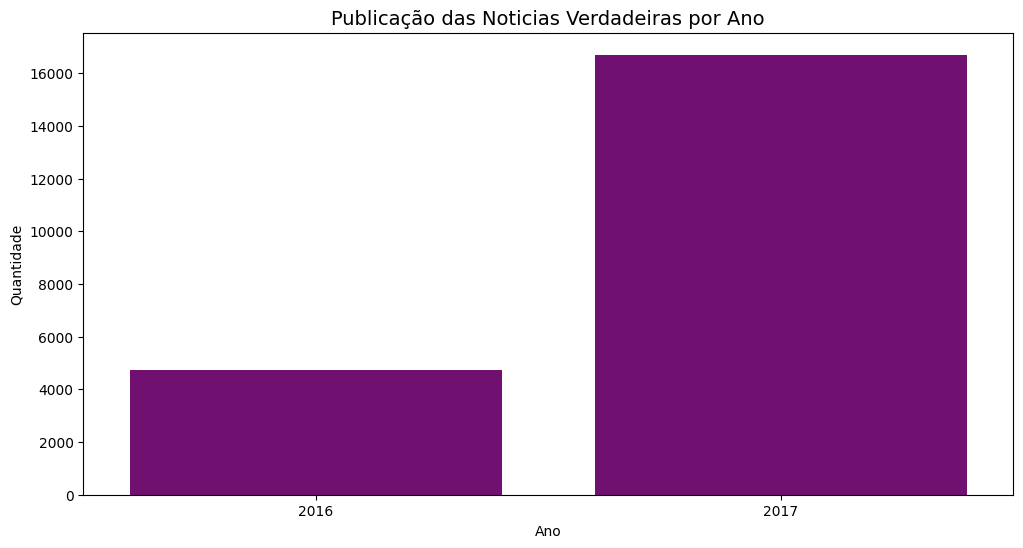

In [40]:
plt.figure(figsize=(12,6))
plt.title('Publicação das Noticias Verdadeiras por Ano',fontsize=14)
sns.countplot(data=true,x=true.ano,color='purple')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

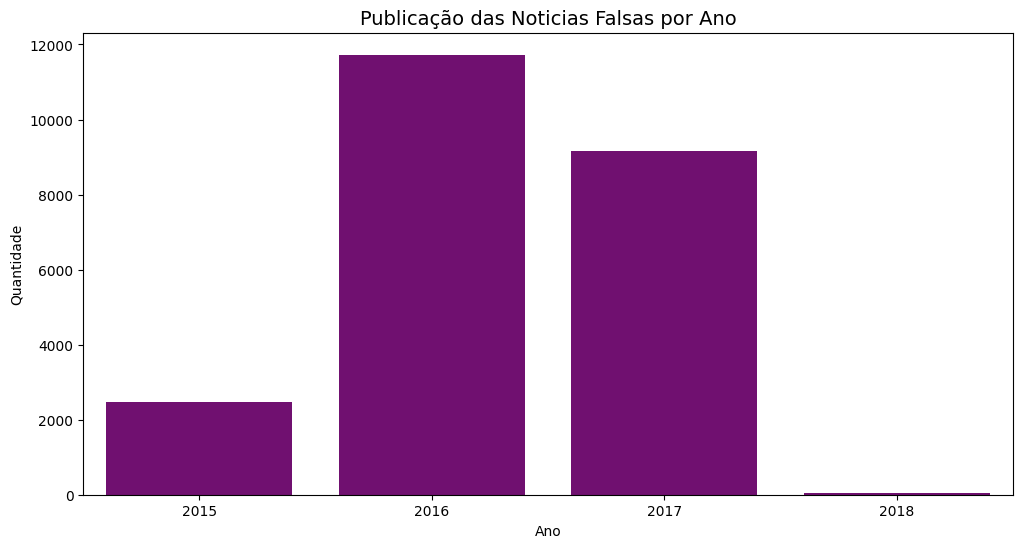

In [41]:
plt.figure(figsize=(12,6))
plt.title('Publicação das Noticias Falsas por Ano',fontsize=14)
sns.countplot(data=fake,x=fake.ano,color='purple')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

## Wordcloud com as noticias verdadeiras por ano

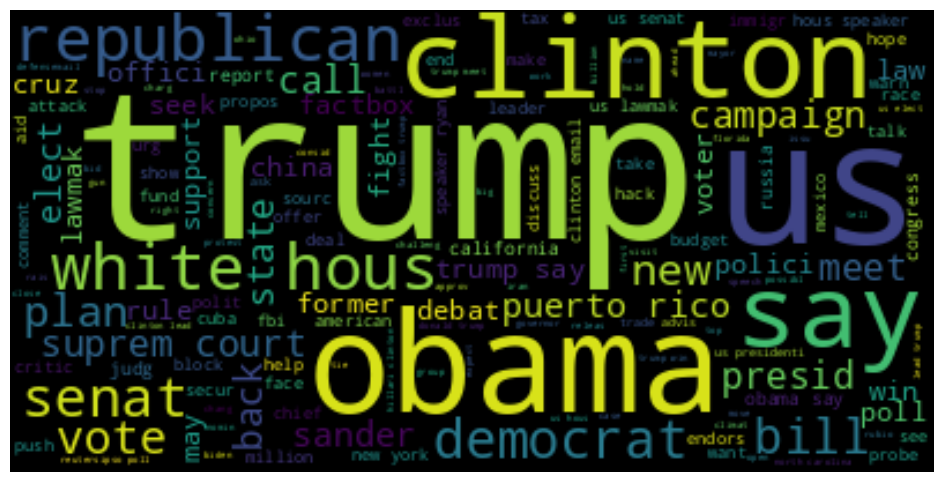

In [43]:
text_true = " ".join(i for i in true[true['ano']==2016]['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_true)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

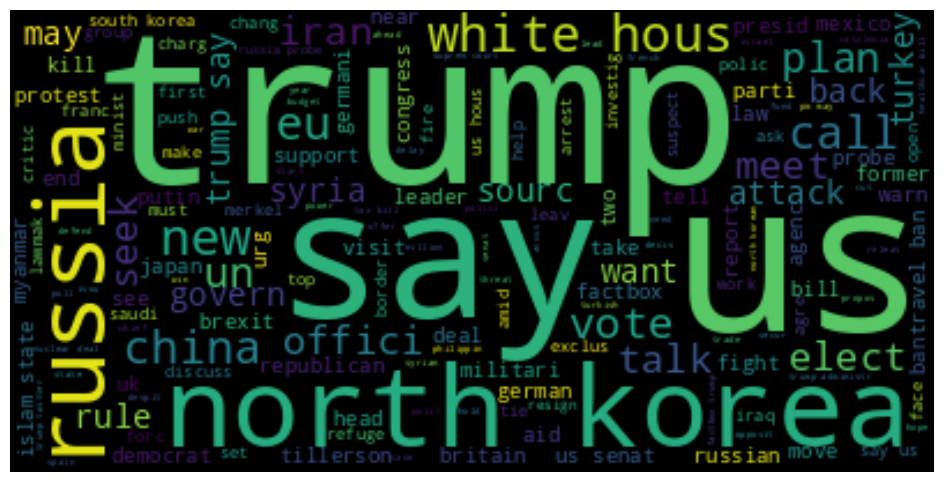

In [44]:
text_true = " ".join(i for i in true[true['ano']==2017]['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_true)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud com as noticias falsas por ano

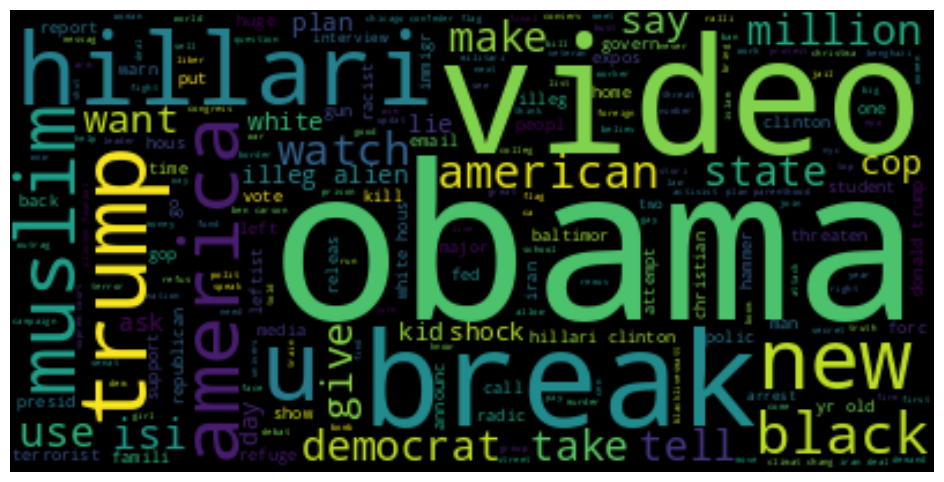

In [45]:
text_fake = " ".join(i for i in fake[fake['ano']==2015]['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_fake)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

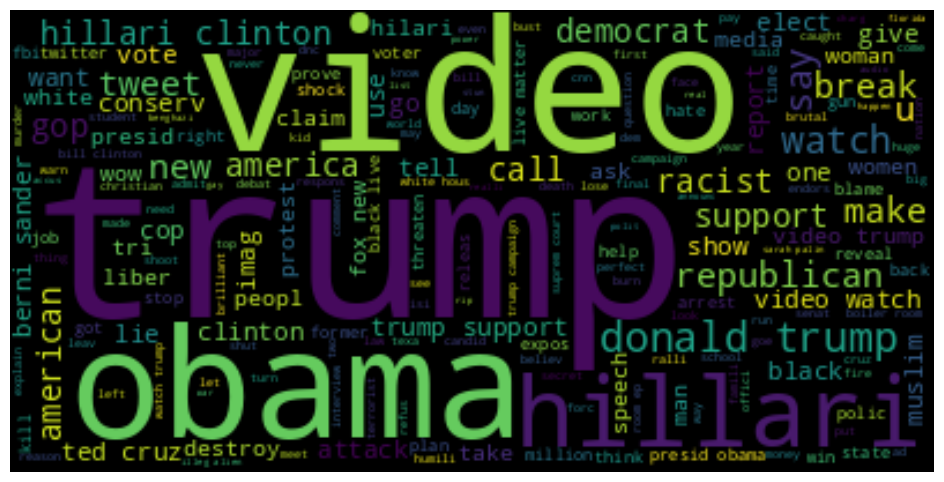

In [46]:
text_fake = " ".join(i for i in fake[fake['ano']==2016]['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_fake)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

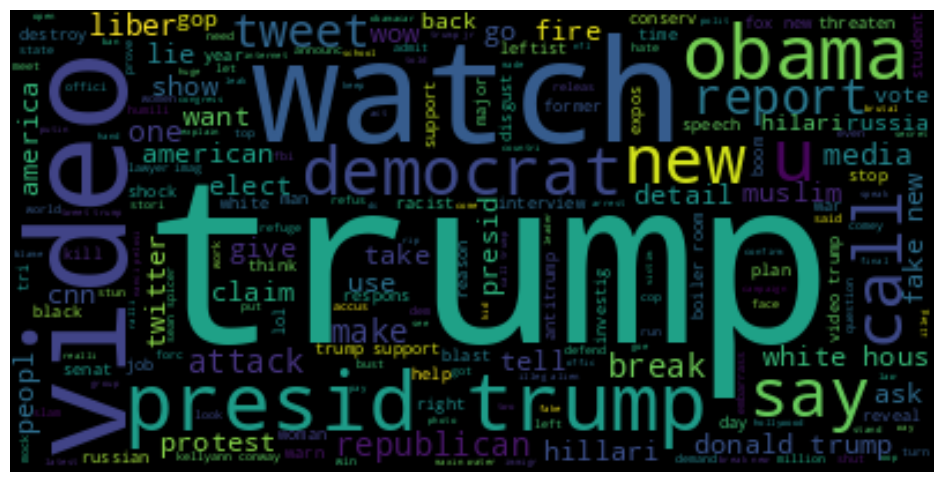

In [47]:
text_fake = " ".join(i for i in fake[fake['ano']==2017]['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_fake)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

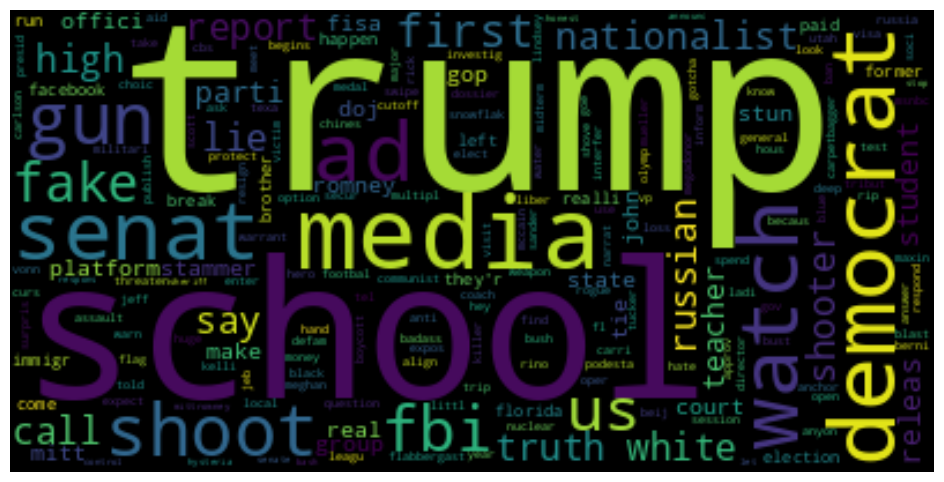

In [48]:
text_fake = " ".join(i for i in fake[fake['ano']==2018]['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text_fake)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()